In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from datetime import datetime

In [17]:
#sns.set(style="whitegrid", context="talk")
sns.set(style="whitegrid")
sns.set_color_codes("dark")

today = datetime.now().strftime('%d-%m-%Y')
week_num = datetime.now().strftime('%W')

risk_set_a = set(['1H','2H','3H'])
risk_set_b = set(['4H','5H','6V','7V','8H'])
risk_set_c = set(['9V','10V'])
risk_set_d = set(['11H','11V','12H','12V','13aH','13aV','13bH','13bV','14H','14V','15V','16V','17V','18H','18V','19V','20H','20V'])
risk_set_e = set(['21V','22V','23V','24V','25V','26V','27V','28V','29H','30H','31H','32H','32V','33V','34V','35H','36H','37H','37V','38H',
             '38V','39H','39V','40H','40V','41H','41V','42H','42V','43H','43V'])
risk_set_f = set(['44V','45V','46H','46V','47H','47V','48H','48V','49H','49V','50H','51V','52H','52V','53V','54V','55V','56V','57H','57V','58H'])
risk_set_g = set(['59V','60H','61H','61V','62H','62V','63H','64H','65H','66H','67H','68H','69H','69V','70V','71V','72V','73H'])
risk_set_h = set(['74V','75H','76H','76V','77V'])
risk_set_i = set(['78V','79H','79V','80H'])


In [18]:
week_num

'21'

In [28]:
PRACTICE = 'All'
FOLDER = '/210518'

In [29]:
os.chdir(u'/home/andy/dev/notebooks/Transfer-RS-Feedback/RS_FEEDBACK/'+PRACTICE+FOLDER)

In [30]:
pwd

u'/home/andy/dev/notebooks/Transfer-RS-Feedback/RS_FEEDBACK/All/210518'

In [31]:
iot_set = set([67,68,89,90,91,94,97,101,102,103,109,110])
cloud_set = set([43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116])
connectivity_set = set([10,12,21,22,24,27,28,29,31,33,42,66,72,80,81,118,121,156,158])
eit_set = set([126,136,141,128,130,129,198,127,1])
uc_set = set([2,4,5,7,8,9,14,70,71,87,123,193,194,195,147])

iot_cols = [67,68,89,90,91,94,97,101,102,103,109,110]
cloud_cols = [43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116]
connectivity_cols = [10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158]
eit_cols = [126,136,141,128,130,129,198,127,1]
uc_cols = [2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]

all_set = set()

all_set.update(iot_set)
all_set.update(cloud_set)
all_set.update(connectivity_set)
all_set.update(eit_set)
all_set.update(uc_set)

req_ref_list = list()

first = True
file_count = 0
product_id = 0

for filename in os.listdir(os.getcwd()):
    df = pd.read_excel(filename, sheet_name=None)
    
    file_count = file_count + 1
    
    sheet_names = df.keys()
    sheets = sheet_names[4:-1]

    print filename
    
    product_id = int(filename[11:14])
    print product_id
    all_set.remove(product_id)

    entity_count = len(sheets)
    print("Entity count: {0:d}".format(entity_count))
    
    for sh in sheets:
        print sh
        if sh == u'PII Data Record': #this is an odd bug!
            print "this is odd! PII Data"
            continue
        df[sh].insert(loc=0, column='Filename', value=filename)
        df[sh].insert(loc=1, column='Product ID', value=product_id)
        df[sh].drop(0, inplace=True)
        df[sh]['Response'].fillna('No Response', inplace=True)
        df[sh]['Remediation Project Ref'].fillna('No Response', inplace=True)
        df[sh]['Response Comments'].fillna('', inplace=True)
        df[sh]['Delivery Date'].fillna('', inplace=True)
        df[sh]['Compliance Assessment'].fillna('N/A', inplace=True)
        if first:
            out_df = df[sh][['Filename',\
                             'Product ID',\
                             'Req Ref',\
                             'Req nr',\
                             'Compliance Assessment',\
                             'Response',\
                             'Response Comments',\
                             'Delivery Date',\
                             'Remediation Project Ref']].copy()
            out_df['Entity Count'] = entity_count
            
            req_ref_list.extend(list(df[sh]['Req Ref']))
            
            first = False
        else:
            cp_df = df[sh][['Filename',\
                            'Product ID',\
                            'Req Ref',\
                            'Req nr',\
                            'Compliance Assessment',\
                            'Response',\
                            'Response Comments',\
                            'Delivery Date',\
                            'Remediation Project Ref']].copy()
            out_df['Entity Count'] = entity_count

            req_ref_list.extend(list(df[sh]['Req Ref']))

            out_df = pd.concat([out_df, cp_df], axis=0, ignore_index=True, copy=True)
            
print file_count

GDPR-RS-EPS007-Global SIP -V4.0 Reviewed 16.05 IB.xlsx
7
Entity count: 2
A - Portal
B - UC Core
GDPR-RS-EPS109-SME SOHO-V4.1 REVIEWED 160518.xlsx
109
Entity count: 1
A - SME SOHO
GDPR-RS-EPS054-Hosting Solution Management-V4.0 RELEASED.xlsx
54
Entity count: 1
A - AIM
GDPR-RS-EPS121-Global WAN-LAN-V4.3.xlsx
121
Entity count: 4
A - Portal
B - Business Logic
C - Database
D - WAN-CPE
GDPR-RS-EPS158-Dedicated Ethernet-V4.3.xlsx
158
Entity count: 4
A - Portal
B - Business Logic
C - WAN-CPE
D - Database
GDPR-RS-EPS043-Private-Cloud-V4.1-REVIEWED-(16-05-2018).xlsx
43
Entity count: 1
A - Private Cloud
GDPR-RS-EPS068-GDSP IT-V4.1 REVIEWED 160518.xlsx
68
Entity count: 5
A - Portal
B - Business Logic
C - Data Exposure
D - NW Integration
E - Database
GDPR-RS-EPS022-BYOx-V5.1 RELEASED.xlsx
22
Entity count: 4
A - BYOx UI
B - Business Logic
C - BYOx Application
D - Database
GDPR-RS-EPS052-Flexible-Computing-V4.1-REVIEWED-(16-05-2018).xlsx
52
Entity count: 1
A - Flexible Computing
GDPR-RS-EPS070-NMR-V4

In [32]:
#missing products
all_set

{14, 24, 101, 129, 193, 194, 195}

In [33]:
len(req_ref_list)

7201

In [34]:
duplicates = set([x for x in req_ref_list if req_ref_list.count(x) > 1])

if len(duplicates) > 0:
    print duplicates
    sys.exit("EXIT: duplicates found")

In [35]:
iot_set

{67, 68, 89, 90, 91, 94, 97, 101, 102, 103, 109, 110}

In [36]:
#out_df[out_df['Req Ref'].str.contains("EPS118-PCA-76V")]

#add product column
out_df['Product Ref'] = out_df['Req Ref'].str.slice(0, -2)

out_df['Product ID'] = out_df['Req Ref'].str.slice(3, 6)

out_df['Category'] = out_df['Req Ref'].str.slice(7, 10)

out_df['Category'].replace('-PC', 'PCA', inplace=True)
out_df['Category'].replace('-SC', 'SCA', inplace=True)

#out_df.drop_duplicates(['Product Ref'], keep='first', inplace=True)

mapping = {'No Response':'No Project Code'}

out_df['Orphan'] = out_df['Remediation Project Ref'].map(lambda x: mapping.get(x, 'Project Code Allocated'))

#out_df[out_df['Product ID'] == '022'].head(50)
#out_df.head()

In [37]:
def return_practice( prod_id ):
    #print int(prod_id)
    if int(prod_id) in iot_set:
        return 'IoT'
    elif int(prod_id) in cloud_set:
        return 'Cloud'
    elif int(prod_id) in connectivity_set:
        return 'Connectivity'
    elif int(prod_id) in eit_set:
        return 'EIT'
    elif int(prod_id) in uc_set:
        return 'UC'
    else:
        print "Unknown Practice"
        return 'Unknown Practice'

out_df['Product ID'].dropna(inplace=True)    
    
out_df['Practice'] = out_df['Product ID'].map(lambda x: return_practice(x))

In [38]:
def return_risk_set( req_id ):
    if req_id in risk_set_a:
        return 'A'
    elif req_id in risk_set_b:
        return 'B'
    elif req_id in risk_set_c:
        return 'C'
    elif req_id in risk_set_d:
        return 'D'
    elif req_id in risk_set_e:
        return 'E'
    elif req_id in risk_set_f:
        return 'F'
    elif req_id in risk_set_g:
        return 'G'
    elif req_id in risk_set_h:
        return 'H'
    elif req_id in risk_set_i:
        return 'I'
    else:
        return 'UNKNOWN'
    
out_df['Risk Category'] = out_df['Req nr'].map(lambda x: return_risk_set(x))

    

In [39]:
out_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category
0,NON-COMPLIANT,,1.0,GDPR-RS-EPS007-Global SIP -V4.0 Reviewed 16.05...,007,No Response,EPS007-PCA-2H-A,2H,Closed,Fully compliant. All PCA 02 partial/non-compli...,EPS007-PCA-2H,PCA,No Project Code,UC,A
1,NON-COMPLIANT,2018-05-25 00:00:00,1.0,GDPR-RS-EPS007-Global SIP -V4.0 Reviewed 16.05...,007,GE-PCA-58H,EPS007-PCA-58H-A,58H,Acknowledged,,EPS007-PCA-58H,PCA,Project Code Allocated,UC,F
2,NON-COMPLIANT,2018-05-18 00:00:00,1.0,GDPR-RS-EPS007-Global SIP -V4.0 Reviewed 16.05...,007,GE-PCA-60H,EPS007-PCA-60H-A,60H,Acknowledged,Process to be developed by Catesian.\n\nThen c...,EPS007-PCA-60H,PCA,Project Code Allocated,UC,G
3,NON-COMPLIANT,,1.0,GDPR-RS-EPS007-Global SIP -V4.0 Reviewed 16.05...,007,No Response,EPS007-PCA-61H-A,61H,Closed,Fully compliant/Agreed with Privacy assessor t...,EPS007-PCA-61H,PCA,No Project Code,UC,G
4,NON-COMPLIANT,,1.0,GDPR-RS-EPS007-Global SIP -V4.0 Reviewed 16.05...,007,No Response,EPS007-PCA-61V-A,61V,Closed,Fully compliant/Agreed with Privacy assessor t...,EPS007-PCA-61V,PCA,No Project Code,UC,G


In [40]:
def return_h_or_v( req_id ):
    req_id_str = str(req_id)
    if "H" in req_id_str:
        return 'HORIZONTAL'
    elif "V" in req_id_str:
        return 'VERTICAL'
    else:
        return 'UNKNOWN'
    
out_df['Horizontal / Vertical'] = out_df['Req nr'].map(lambda x: return_h_or_v(x))


In [41]:
out_df['Approved by DPO:'] = ""
out_df['If Approved, change to ?'] = ""
out_df['New Comment to be inserted into RS and DPIA'] = ""

In [42]:
#FIXME: Bug!
out_df['Product ID'].fillna('dropme',inplace=True)

out_df = out_df[out_df['Product ID'] != 'dropme'].copy()


In [43]:
out_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
0,NON-COMPLIANT,,1.0,GDPR-RS-EPS007-Global SIP -V4.0 Reviewed 16.05...,007,No Response,EPS007-PCA-2H-A,2H,Closed,Fully compliant. All PCA 02 partial/non-compli...,EPS007-PCA-2H,PCA,No Project Code,UC,A,HORIZONTAL,,,
1,NON-COMPLIANT,2018-05-25 00:00:00,1.0,GDPR-RS-EPS007-Global SIP -V4.0 Reviewed 16.05...,007,GE-PCA-58H,EPS007-PCA-58H-A,58H,Acknowledged,,EPS007-PCA-58H,PCA,Project Code Allocated,UC,F,HORIZONTAL,,,
2,NON-COMPLIANT,2018-05-18 00:00:00,1.0,GDPR-RS-EPS007-Global SIP -V4.0 Reviewed 16.05...,007,GE-PCA-60H,EPS007-PCA-60H-A,60H,Acknowledged,Process to be developed by Catesian.\n\nThen c...,EPS007-PCA-60H,PCA,Project Code Allocated,UC,G,HORIZONTAL,,,
3,NON-COMPLIANT,,1.0,GDPR-RS-EPS007-Global SIP -V4.0 Reviewed 16.05...,007,No Response,EPS007-PCA-61H-A,61H,Closed,Fully compliant/Agreed with Privacy assessor t...,EPS007-PCA-61H,PCA,No Project Code,UC,G,HORIZONTAL,,,
4,NON-COMPLIANT,,1.0,GDPR-RS-EPS007-Global SIP -V4.0 Reviewed 16.05...,007,No Response,EPS007-PCA-61V-A,61V,Closed,Fully compliant/Agreed with Privacy assessor t...,EPS007-PCA-61V,PCA,No Project Code,UC,G,VERTICAL,,,


In [44]:
out_df['Delivery Date'].replace(to_replace='25/5//18', 
                                value=datetime(2018,5,25), 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Delivery Date'].replace(to_replace=['GE-PCA-75H', 'GE-PCA-52H'], 
                                value=datetime(2018,5,18), 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Delivery Date'].replace(to_replace='11th May 2018', 
                                value=datetime(2018,5,11), 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)

out_df['Delivery Date'].replace(to_replace='30th April 2018', 
                                value=datetime(2018,4,18), 
                                inplace=True, 
                                limit=None, 
                                regex=False, method='pad', axis=None)


In [45]:
out_df.loc[out_df['Category'] == 'SCA','Horizontal / Vertical'] = 'VERTICAL'

In [46]:
out_df.loc[(out_df['Category'] == 'SCA')&
           (out_df['Compliance Assessment'] == 'N/A'),'Compliance Assessment'] = '0 - n/a'


In [47]:
out_df.loc[(out_df['Horizontal / Vertical'] == 'HORIZONTAL')&
           (out_df['Delivery Date'] == 'tbc'),'Delivery Date'] = datetime(2018,5,18)

out_df.loc[(out_df['Horizontal / Vertical'] == 'HORIZONTAL')&
           (out_df['Delivery Date'] == ''),'Delivery Date'] = datetime(2018,5,18)

out_df.loc[(out_df['Horizontal / Vertical'] == 'VERTICAL')&
           (out_df['Delivery Date'] == 'tbc'),'Delivery Date'] = datetime(2018,10,30)

out_df.loc[(out_df['Horizontal / Vertical'] == 'VERTICAL')&
           (out_df['Delivery Date'] == ''),'Delivery Date'] = datetime(2018,10,30)


In [48]:
out_df['Delivery Date'].value_counts()

2018-10-31    1954
2018-05-18    1410
2018-10-30     810
2018-05-25     483
2018-05-11     480
2018-11-20     386
2018-04-30     336
2018-09-25     178
2018-05-04     177
2018-03-31     163
2018-06-30     130
2018-05-15      98
2018-04-27      98
2018-05-01      83
2018-04-18      76
2018-07-30      68
2018-02-28      50
2018-07-03      30
2018-07-07      29
2018-05-31      24
2017-04-30      24
2018-09-11      22
2018-07-31      14
2018-06-04      12
2018-05-02      10
2018-05-22       9
2018-06-29       9
2018-06-15       4
2018-06-08       4
2018-04-03       4
2017-10-31       4
2018-03-30       4
2018-05-30       3
2018-02-08       3
2018-08-31       2
2018-03-28       2
2018-03-07       2
2018-07-12       1
2018-07-08       1
2018-06-19       1
2018-07-10       1
2018-07-11       1
2018-07-09       1
Name: Delivery Date, dtype: int64

In [49]:
output_writer = pd.ExcelWriter('../'+PRACTICE+'-REMEDIATION-STATS-Week'+week_num+'-'+today+'.xlsx')
out_df.to_excel(output_writer, 'REMEDIATION STATS')
output_writer.save()

Text(0.5,1,'Chart to show all requirements and their response types: All 21-05-2018')

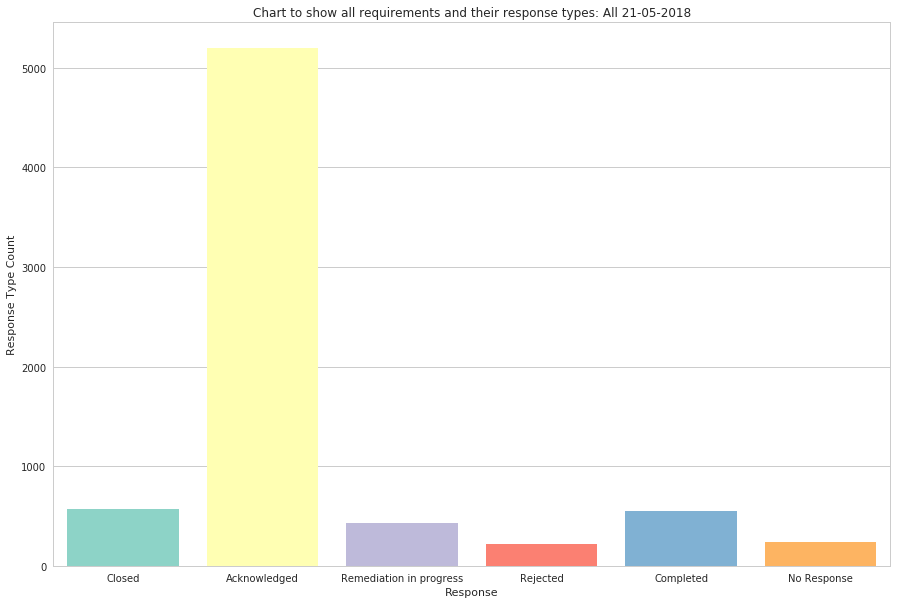

In [50]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df, ax=ax, x='Response', saturation=1, palette='Set3')
ax.set_ylabel("Response Type Count")
ax.set_title("Chart to show all requirements and their response types: "+PRACTICE+" "+today)

In [51]:
fig.savefig("../"+PRACTICE+"-fig-"+today+".png")

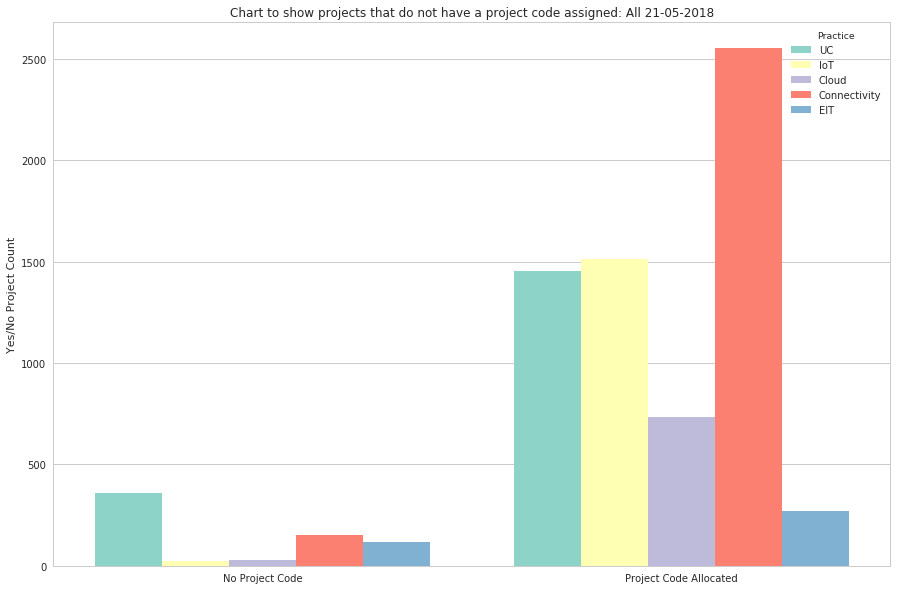

In [52]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df, ax=ax, x='Orphan', hue='Practice',saturation=1, palette='Set3')
ax.set_ylabel("Yes/No Project Count")
ax.set_xlabel("")
ax.set_title("Chart to show projects that do not have a project code assigned: "+PRACTICE+" "+today)

fig.savefig("../"+PRACTICE+"-project-codes-fig-"+today+".png")

In [53]:
out_df[out_df['Practice']=='Unknown Practice']

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA


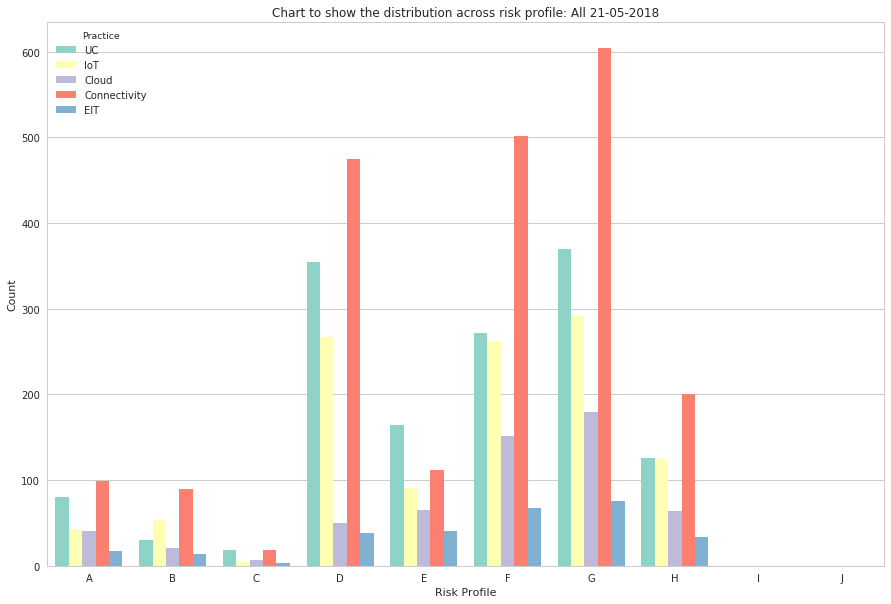

In [54]:
#out_df[out_df['Category']=='PCA']['Risk Category'].value_counts(dropna=False,sort=False)

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df[out_df['Category']=='PCA'], ax=ax, x='Risk Category', 
                   hue='Practice',saturation=1, palette='Set3',
                   order=['A','B','C','D','E','F','G','H','I','J'])
ax.set_ylabel("Count")
ax.set_xlabel("Risk Profile")
ax.set_title("Chart to show the distribution across risk profile: "+PRACTICE+" "+today)

fig.savefig("../"+PRACTICE+"-risk-cats-fig-"+today+".png")

In [55]:
#pd.get_dummies(out_df['Response'])
out_df['Response'].value_counts()

Acknowledged               5199
Closed                      572
Completed                   546
Remediation in progress     434
No Response                 234
Rejected                    216
Name: Response, dtype: int64

In [56]:
COLUMNS = {'PRIVACY_REQUIREMENT_CONTENT', 'REQ_NO', 'VERTICAL', 'HORIZONTAL', 'HYBRID', 'PC', 'NC'}

INDEX = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

req_content = ['']
vertical = [15, ]

uc_risk_df = pd.DataFrame(columns=COLUMNS, index=INDEX)


In [57]:
uc_risk_df

,PRIVACY_REQUIREMENT_CONTENT,VERTICAL,NC,HYBRID,PC,REQ_NO,HORIZONTAL
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN
J,NaN,NaN,NaN,NaN,NaN,NaN,NaN
